In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import losses

In [2]:
df = pdr.get_data_tiingo("MSFT", api_key="aeeaa9dbc8f82f2c361abaa259050d75e736b424")
# df = pdr.get_data_tiingo("600958", api_key="aeeaa9dbc8f82f2c361abaa259050d75e736b424")
df.to_csv("MSFT.csv")
df_stock = pd.read_csv("MSFT.csv")
df_stock.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2017-03-29 00:00:00+00:00,65.47,65.50,64.9475,65.12,13618424,61.112979,61.140982,60.625251,60.786271,13618424,0.0,1.0
1,MSFT,2017-03-30 00:00:00+00:00,65.71,65.98,65.3600,65.42,15122823,61.337007,61.589039,61.010299,61.066306,15122823,0.0,1.0
2,MSFT,2017-03-31 00:00:00+00:00,65.86,66.19,65.4500,65.65,21040331,61.477025,61.785063,61.094310,61.281000,21040331,0.0,1.0
3,MSFT,2017-04-03 00:00:00+00:00,65.55,65.94,65.1900,65.81,20400871,61.187655,61.551701,60.851613,61.430352,20400871,0.0,1.0
4,MSFT,2017-04-04 00:00:00+00:00,65.73,65.81,65.2800,65.39,12997449,61.355676,61.430352,60.935623,61.038303,12997449,0.0,1.0


In [3]:
df_stock.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,MSFT,2022-03-21 00:00:00+00:00,299.16,300.14,294.9000,298.89,28107855,299.16,300.14,294.9000,298.89,28107855,0.0,1.0
1254,MSFT,2022-03-22 00:00:00+00:00,304.06,305.00,298.7700,299.80,27441386,304.06,305.00,298.7700,299.80,27441386,0.0,1.0
1255,MSFT,2022-03-23 00:00:00+00:00,299.49,303.23,297.7201,300.51,25715377,299.49,303.23,297.7201,300.51,25715377,0.0,1.0
1256,MSFT,2022-03-24 00:00:00+00:00,304.10,304.20,298.3150,299.14,24484456,304.10,304.20,298.3150,299.14,24484456,0.0,1.0
1257,MSFT,2022-03-25 00:00:00+00:00,303.68,305.50,299.2855,305.23,22443541,303.68,305.50,299.2855,305.23,22443541,0.0,1.0


In [4]:
df_close = df_stock["close"]
df_date = (df_stock["date"].str[:4]+ df_stock["date"].str[5:7]).astype(int)
df_close

0        65.47
1        65.71
2        65.86
3        65.55
4        65.73
         ...  
1253    299.16
1254    304.06
1255    299.49
1256    304.10
1257    303.68
Name: close, Length: 1258, dtype: float64

In [5]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

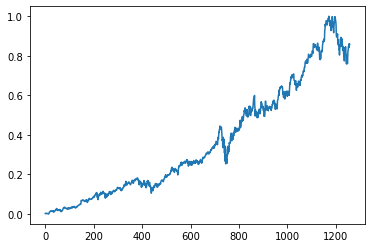

In [6]:
plt.plot(df_close)

In [7]:
train_size = int(len(df_close)*0.7)
test_size = len(df_close) - train_size
close_train = df_close[0:train_size]
close_test = df_close[train_size:len(df_close),:1]
close_train

array([[1.86942767e-03],
       [2.73224044e-03],
       [3.27149842e-03],
       [2.15703192e-03],
       [2.80414150e-03],
       [2.19298246e-03],
       [2.80414150e-03],
       [2.62438884e-03],
       [2.08513086e-03],
       [1.90537820e-03],
       [1.00661490e-03],
       [0.00000000e+00],
       [1.90537820e-03],
       [1.58182341e-03],
       [3.23554789e-04],
       [1.97727926e-03],
       [5.21282715e-03],
       [9.27523727e-03],
       [1.06773080e-02],
       [1.03537532e-02],
       [1.19355766e-02],
       [1.26186368e-02],
       [1.60339373e-02],
       [1.56384814e-02],
       [1.48475697e-02],
       [1.38769054e-02],
       [1.45599655e-02],
       [1.43442623e-02],
       [1.47037676e-02],
       [1.56744320e-02],
       [1.26186368e-02],
       [1.23310325e-02],
       [1.25107852e-02],
       [1.60339373e-02],
       [9.09548461e-03],
       [9.92234685e-03],
       [9.85044579e-03],
       [1.25826862e-02],
       [1.34095485e-02],
       [1.37331032e-02],


In [8]:
def seperate_data(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
x_train, y_train = seperate_data(close_train, 100)
x_test, y_test = seperate_data(close_test, 100)

In [10]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [11]:
# create the model
model = models.Sequential()

In [12]:
np.version.version

'1.19.5'

In [13]:
model.add(layers.LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(layers.LSTM(50, return_sequences=True))
model.add(layers.LSTM(50))
model.add(layers.Dense(1))

In [14]:
img_new = model.predict(x_test)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss="mean_squared_error", optimizer="adam")

In [17]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 6s 198ms/step - loss: 0.0129 - val_loss: 0.0940
Epoch 2/100
13/13 [==============================] - 2s 124ms/step - loss: 0.0029 - val_loss: 0.0111
Epoch 3/100
13/13 [==============================] - 2s 122ms/step - loss: 6.7730e-04 - val_loss: 0.0017
Epoch 4/100
13/13 [==============================] - 2s 124ms/step - loss: 5.2691e-04 - val_loss: 0.0022
Epoch 5/100
13/13 [==============================] - 2s 122ms/step - loss: 4.9638e-04 - val_loss: 0.0028
Epoch 6/100
13/13 [==============================] - 2s 127ms/step - loss: 4.7255e-04 - val_loss: 0.0026
Epoch 7/100
13/13 [==============================] - 2s 121ms/step - loss: 4.8228e-04 - val_loss: 0.0047
Epoch 8/100
13/13 [==============================] - 2s 122ms/step - loss: 5.9651e-04 - val_loss: 0.0075
Epoch 9/100
13/13 [==============================] - 2s 120ms/step - loss: 4.8663e-04 - val_loss: 0.0045
Epoch 10/100
13/13 [==============================] - 2s 121ms/

13/13 [==============================] - 2s 121ms/step - loss: 2.6184e-04 - val_loss: 0.0028
Epoch 79/100
13/13 [==============================] - 2s 120ms/step - loss: 2.0267e-04 - val_loss: 0.0011
Epoch 80/100
13/13 [==============================] - 2s 120ms/step - loss: 1.9111e-04 - val_loss: 0.0019
Epoch 81/100
13/13 [==============================] - 2s 119ms/step - loss: 2.0397e-04 - val_loss: 0.0024
Epoch 82/100
13/13 [==============================] - 2s 121ms/step - loss: 1.8284e-04 - val_loss: 0.0010
Epoch 83/100
13/13 [==============================] - 2s 122ms/step - loss: 1.9997e-04 - val_loss: 0.0024
Epoch 84/100
13/13 [==============================] - 2s 121ms/step - loss: 2.0166e-04 - val_loss: 0.0017
Epoch 85/100
13/13 [==============================] - 2s 121ms/step - loss: 1.8537e-04 - val_loss: 7.5580e-04
Epoch 86/100
13/13 [==============================] - 2s 120ms/step - loss: 2.1483e-04 - val_loss: 0.0038
Epoch 87/100
13/13 [==============================] - 2

In [18]:
predict_data_train = model.predict(x_train)
predict_data_raw = model.predict(x_test)

In [19]:
predict_data_test = scaler.inverse_transform(predict_data_raw)

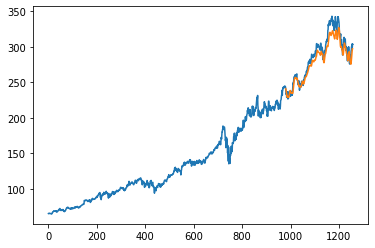

In [20]:
predict_plot = np.empty_like(df_close)
predict_plot[:,:] = np.nan
predict_plot[len(predict_data_train)+200+1 : len(df_close)-1, :] = predict_data_test
plt.plot(scaler.inverse_transform(df_close))
plt.plot(predict_plot)

# Prediction Function

In [68]:
# 三个parametres
# model：模型本身
# df_close：所有的close数据
# days：需要预测的天数
def stock_predict(model, df_close, days):
    start = 0
    end = 0
    train_size = int(len(df_close)*0.7)
    test_size = len(df_close) - train_size
    close_train = df_close[0:train_size]
    close_test = df_close[train_size:len(df_close),:1]
    x_train, y_train = seperate_data(close_train, 100)
    x_test, y_test = seperate_data(close_test, 100)
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
    
    num_take = len(close_test)-300
    x_input=close_test[num_take:].reshape(1,-1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    lst_output=[]
    n_steps=300
    i=0
    while(i<60):

        if(len(temp_input)>n_steps):
            x_input=np.array(temp_input[1:])
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i=i+1
    
    start=len(df_close)-1000
    end=start+days
    day_new=np.arange(1,start)
    day_pred=np.arange(start,end)

    plt.plot(day_new,scaler.inverse_transform(df_close[1001:]))
    plt.plot(day_pred,scaler.inverse_transform(lst_output[:days]))
        
    all_pred = scaler.inverse_transform(lst_output[:days])
    pred_diff = all_pred[-1][0] - scaler.inverse_transform(df_close)[-1][0]
    change_rate = pred_diff/(scaler.inverse_transform(df_close)[-1][0])
    change_rate_str = str(round(change_rate*100, 5)) + "%"
    print("The change rate after " +str(days)+ " days is: ", change_rate_str)  
    return change_rate_str


The change rate after 7 days is:  -7.48251%


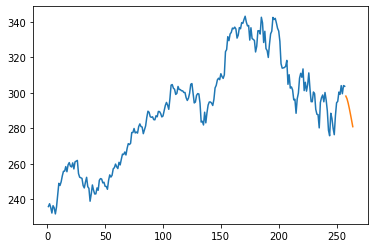

In [70]:
change_r = stock_predict(model, df_close, 7)